Classificação de imagens de roupa.\
Resolvendo problema de classificação\
Datase do keras\
Usaremos este conjunto de dados, que se encontra no keras, que fica em cima do TensorFlow. Dentro do Keras, ele está em uma parte de conjunto de dados, ou datasets. É assim que acessamos um dataset dentro do Keras.

In [1]:
!pip install --upgrade tensorflow

In [2]:
# deep learing
import tensorflow
from tensorflow import keras

# Gráficos
import matplotlib.pyplot as plt

# tratamento de dados
import numpy as np

In [3]:
dataset = keras.datasets.fashion_mnist

In [4]:
# carregando os dados
((imagens_treino, identificacoes_treino),(imagens_teste,identificacoes_teste)) = dataset.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# quantidade
print(len(imagens_treino))
print(imagens_treino.shape)
print(len(identificacoes_treino))
print(len(identificacoes_teste))

60000
(60000, 28, 28)
60000
10000


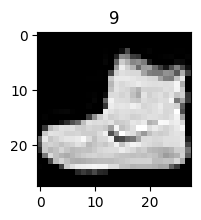

In [6]:
# visualizando imagens pelo gráfico
plt.figure(figsize=(4, 2))  # O tamanho é definido em polegadas
# Exibindo a primeira imagem do conjunto de dados de treinamento
plt.imshow(imagens_treino[0], cmap='gray')
plt.title(identificacoes_treino[0])
# Mostrando a imagem
plt.show()

In [7]:
# identificações
print(identificacoes_treino.min())
print(identificacoes_treino.max())
print('Quindade de classificações:')
print(np.unique(identificacoes_treino))

0
9
Quindade de classificações:
[0 1 2 3 4 5 6 7 8 9]


In [8]:
total_de_classificacoes = len(np.unique(identificacoes_treino))
total_de_classificacoes

10

In [9]:
nomes_de_classificacoes = ['Camiseta','Calça','Pullover','Vestido','Casaco','Sandália','Camisa','Tênis','Bolsa','Bota']

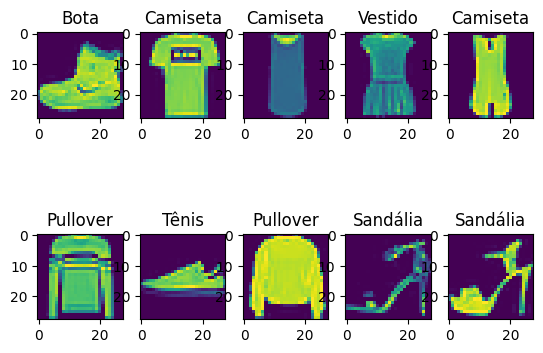

In [10]:
for imagem in range(total_de_classificacoes):
  # 5 - colunas, 2 linhas
  plt.subplot(2,5,imagem + 1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

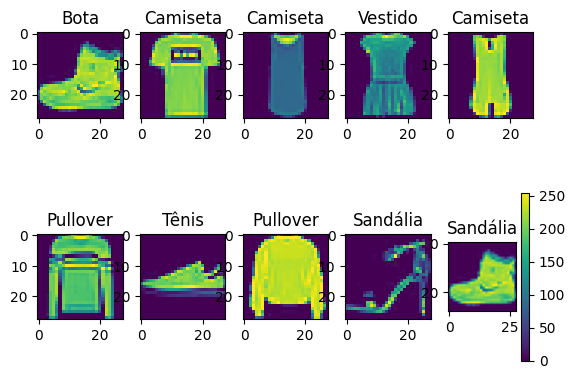

In [11]:
for imagem in range(total_de_classificacoes):
  # 5 - colunas, 2 linhas
  plt.subplot(2,5,imagem + 1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

plt.imshow(imagens_treino[0])
plt.colorbar()

In [12]:
identificacoes_treino[0]

9

Etapa do Modelo

1- etapa:
- Entrada
- Processamento
- Saída

2- etapa:
- compilar o modelo.

3- etapa:
- treinar o modelo.

In [13]:
# Entrada
modelo = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28,28)),            # entrada camadas-> input_shape(28,28) # entrada.,
    keras.layers.Dense(256, activation = tensorflow.nn.relu), # processamento -> camada denso, camada de processamento, Função relu do tensorflow relu 'unidade linear unificada' camada intermediaria.,
    keras.layers.Dense(10, activation = tensorflow.nn.softmax) # saida -> camada de saida.,
                           ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# compilando o modelo
# otimizador  -> optimizer tipos: adam
# perdas -> loss tipos: entropia categorica cruzada esparsa
modelo.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy')

# treinando o modelo

modelo.fit(imagens_treino, identificacoes_treino)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - loss: 10.5631


In [15]:
# Então, o que podemos fazer é deixar um espaço para este intervalo entre 0 e 1, capturar tudo o que vem no meio. Para isso,
# basta não utilizarmos inteiros, e sim o ponto flutuante, que incluirá o 0, 0.1, 0.2, 0.3, e assim por diante. Para isso,
# na primeira linha do nosso modelo daremos um Enter,
# e o que faremos é uma transformação nas nossas imagens de treino e podemos pegar estes 255 pixels e fazer uma divisão.

# E esse processo que fizemos, de dividir as imagens de treino por 255 é chamado de Normalização.
imagens_treino = imagens_treino/ 255.0


modelo.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy')

# treinando o modelo

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.6117


In [16]:
# Entrada
modelo = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28,28)),            # entrada camadas-> input_shape(28,28) # entrada.,
    keras.layers.Dense(256, activation = tensorflow.nn.relu), # processamento -> camada denso, camada de processamento, Função relu do tensorflow relu 'unidade linear unificada' camada intermediaria.,
    keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax) # saida -> camada de saida.,
                           ])

In [17]:

modelo.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy')

# treinando o modelo

modelo.fit(imagens_treino, identificacoes_treino)

# o resultado não alterou nada

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.5872


In [18]:
# Entrada
modelo = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(64, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
                           ])


modelo.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy')
modelo.fit(imagens_treino, identificacoes_treino)

# ou seja colocar camadas a mais não diminui as perdas.

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.6080


In [19]:
# repedindo varias vezes. epocas que é repedir varias vezes e calcula entropia cruzada.
# Entrada
modelo = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
                           ])


modelo.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy')
modelo.fit(imagens_treino, identificacoes_treino, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.6095
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.3707
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.3262
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.3019
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.2795


In [20]:
imagens_treino = imagens_treino/ 255.0

# adicionando uma métrica
modelo = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
                           ])


modelo.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
modelo.fit(imagens_treino, identificacoes_treino, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5866 - loss: 1.3756
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7819 - loss: 0.6086
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8102 - loss: 0.5356
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8253 - loss: 0.4895
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8345 - loss: 0.4665


In [21]:
testes = modelo.predict(imagens_teste)
testes[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.99999994],
      dtype=float32)

In [22]:
# argmax -> maior argumento é da bilbioteca do numpy
testes = modelo.predict(imagens_teste)
print(f'Resultado teste {np.argmax(testes[0])}')
print(f'número da imgam de teste: {identificacoes_teste[0]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Resultado teste 9
número da imgam de teste: 9


In [23]:
# Critério de avaliação
# retorna uma array com dois valores a primeira é a perda e o segundo é a acuracia.
modelo.evaluate(imagens_teste, identificacoes_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6994 - loss: 21123.0332


[22416.556640625, 0.6891999840736389]

In [24]:
perda_teste , acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)

print(f'Perda do teste {perda_teste:.2f} \nAcurácia do teste {acuracia_teste:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6994 - loss: 21123.0332
Perda do teste 22416.56 
Acurácia do teste 0.69


In [25]:
# adicionando a quantidade para validação
# modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8438 - loss: 0.4473 - val_accuracy: 0.8415 - val_loss: 0.4375
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8454 - loss: 0.4351 - val_accuracy: 0.8470 - val_loss: 0.4283
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8482 - loss: 0.4306 - val_accuracy: 0.8509 - val_loss: 0.4226
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8560 - loss: 0.4145 - val_accuracy: 0.8541 - val_loss: 0.4187
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8560 - loss: 0.4107 - val_accuracy: 0.8547 - val_loss: 0.4120


In [26]:
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

# gerando o gráfico

historico

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8583 - loss: 0.4028 - val_accuracy: 0.8563 - val_loss: 0.4055
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8622 - loss: 0.3962 - val_accuracy: 0.8532 - val_loss: 0.4086
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8648 - loss: 0.3866 - val_accuracy: 0.8533 - val_loss: 0.4018
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8646 - loss: 0.3889 - val_accuracy: 0.8600 - val_loss: 0.3983
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8677 - loss: 0.3801 - val_accuracy: 0.8612 - val_loss: 0.3880


In [27]:
historico.history

{'accuracy': [0.8586041927337646,
  0.8607500195503235,
  0.8621041774749756,
  0.8641250133514404,
  0.8656874895095825],
 'loss': [0.4029273986816406,
  0.39657682180404663,
  0.39140018820762634,
  0.38668790459632874,
  0.3813566565513611],
 'val_accuracy': [0.856333315372467,
  0.8531666398048401,
  0.8532500267028809,
  0.8600000143051147,
  0.8611666560173035],
 'val_loss': [0.40553775429725647,
  0.4086246192455292,
  0.4018254280090332,
  0.3983159065246582,
  0.3880462348461151]}

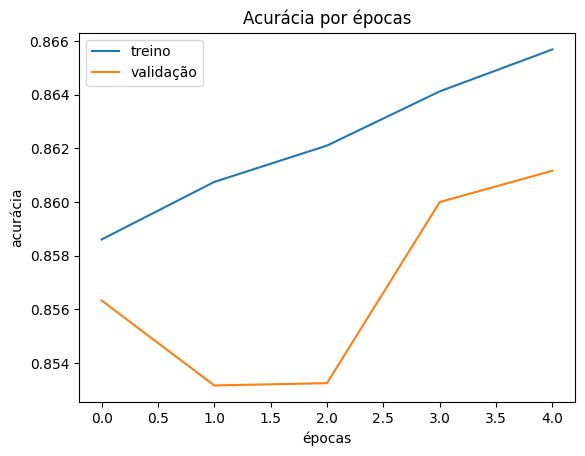

In [28]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino','validação'])

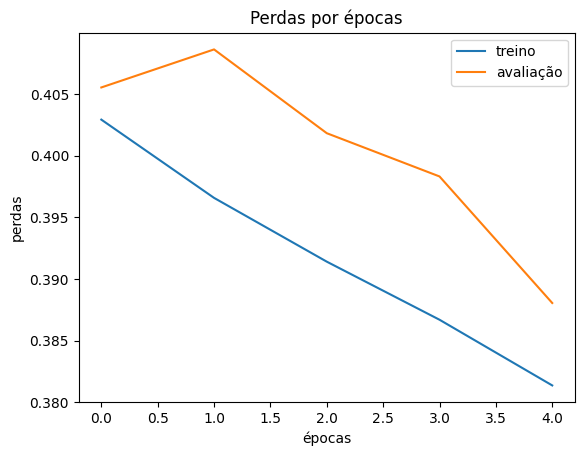

In [29]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('épocas')
plt.ylabel('perdas')
plt.legend(['treino','avaliação'])

In [30]:
imagens_treino = imagens_treino/ 255.0

# adicionando uma métrica
modelo = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
                           ])


modelo.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
# modelo.fit(imagens_treino, identificacoes_treino, epochs = 10, validation_split = 0.2)

In [31]:
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1015 - loss: 2.3027 - val_accuracy: 0.0983 - val_loss: 2.3024
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.1062 - loss: 2.3022 - val_accuracy: 0.0983 - val_loss: 2.3008
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1211 - loss: 2.2999 - val_accuracy: 0.1003 - val_loss: 2.2956
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1390 - loss: 2.2935 - val_accuracy: 0.2097 - val_loss: 2.2853
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1978 - loss: 2.2819 - val_accuracy: 0.2515 - val_loss: 2.2693
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1969 - loss: 2.2645 - val_accuracy: 0.2482 - val_loss: 2.2479
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2072 - loss: 2.2428 - val_accuracy: 0.2328 - val_loss: 2.2230
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2290 - loss: 2.2

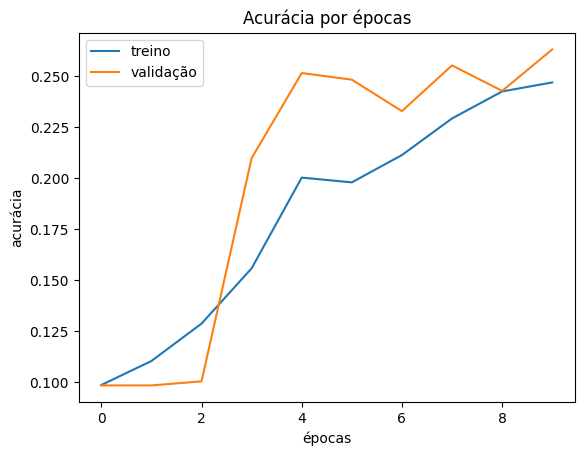

In [32]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino','validação'])

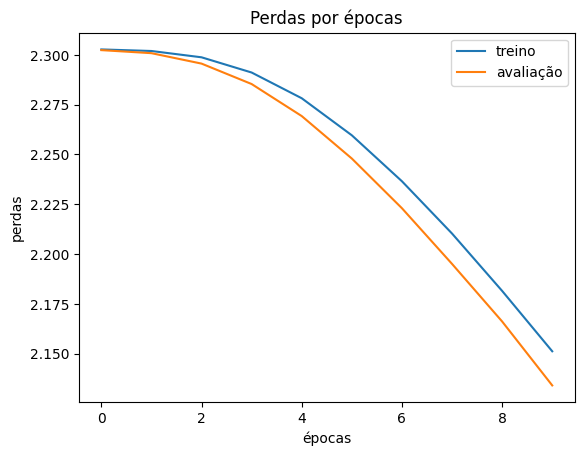

In [33]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('épocas')
plt.ylabel('perdas')
plt.legend(['treino','avaliação'])

In [42]:
imagens_treino, imagens_teste = imagens_treino / 255.0, imagens_teste / 255.0

# adicionando uma métrica
modelo = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2), # desativando alguns neuronios para poder não execultar como vinte porcento.
    keras.layers.Dense(10, tensorflow.nn.softmax)
                           ])


modelo.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1004 - loss: 2.3028 - val_accuracy: 0.0957 - val_loss: 2.3029
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.0959 - loss: 2.3028 - val_accuracy: 0.0957 - val_loss: 2.3028
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0992 - loss: 2.3027 - val_accuracy: 0.0983 - val_loss: 2.3026
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1007 - loss: 2.3028 - val_accuracy: 0.0983 - val_loss: 2.3026
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1000 - loss: 2.3027 - val_accuracy: 0.0957 - val_loss: 2.3028
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0946 - loss: 2.3028 - val_accuracy: 0.0957 - val_loss: 2.3028
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.0985 - loss: 2.3027 - val_accuracy: 0.0983 - val_loss: 2.3027
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1014 - loss: 2.302

In [43]:
tf.keras.models.load_model
# Salvar o modelo no formato nativo Keras
modelo.save('modelo.keras')

# Carregar o modelo salvo
modelo_salvo = load_model('modelo.keras')

# Avaliar o modelo carregado com dados de teste
perda, precisao = modelo_salvo.evaluate(imagens_teste, identificacoes_teste, verbose=2)
print(f'Perda: {perda}, Precisão: {precisao}')

# Fazer previsões com o modelo carregado
previsoes = modelo_salvo.predict(imagens_teste)

TypeError: <class 'keras.src.models.sequential.Sequential'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras', 'class_name': 'Sequential', 'config': {'name': 'sequential_8', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 131929859725664}, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': [None, 28, 28], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_8'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Flatten', 'config': {'name': 'flatten_9', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28]}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_20', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 131929859725664}, 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 784]}}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 131929859725664}, 'rate': 0.2, 'seed': None, 'noise_shape': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 256]}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_21', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 131929859725664}, 'units': 10, 'activation': {'module': 'builtins', 'class_name': 'function', 'config': 'softmax_v2', 'registered_name': 'function'}, 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 256]}}], 'build_input_shape': [None, 28, 28]}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28]}, 'compile_config': {'optimizer': {'module': 'keras.optimizers', 'class_name': 'Adam', 'config': {'name': 'adam', 'learning_rate': 0.0010000000474974513, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}, 'registered_name': None}, 'loss': 'sparse_categorical_crossentropy', 'loss_weights': None, 'metrics': ['accuracy'], 'weighted_metrics': None, 'run_eagerly': False, 'steps_per_execution': 1, 'jit_compile': False}}.

Exception encountered: <class 'keras.src.layers.core.dense.Dense'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_21', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 131929859725664}, 'units': 10, 'activation': {'module': 'builtins', 'class_name': 'function', 'config': 'softmax_v2', 'registered_name': 'function'}, 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 256]}}.

Exception encountered: Error when deserializing class 'Dense' using config={'name': 'dense_21', 'trainable': True, 'dtype': 'float32', 'units': 10, 'activation': {'module': 'builtins', 'class_name': 'function', 'config': 'softmax_v2', 'registered_name': 'function'}, 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}.

Exception encountered: Could not interpret activation function identifier: {'module': 'builtins', 'class_name': 'function', 'config': 'softmax_v2', 'registered_name': 'function'}

In [39]:
from tensorflow.keras.models import load_model

# salvando o modelo
modelo.save('modelo_0asd1.h5')



modelo_salvo = load_model('modelo_0asd1.h5')

TypeError: Error when deserializing class 'Dense' using config={'name': 'dense_16', 'trainable': True, 'dtype': 'float32', 'units': 10, 'activation': {'module': 'builtins', 'class_name': 'function', 'config': 'softmax_v2', 'registered_name': 'function'}, 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}.

Exception encountered: Could not interpret activation function identifier: {'module': 'builtins', 'class_name': 'function', 'config': 'softmax_v2', 'registered_name': 'function'}

In [ ]:
# argmax -> maior argumento é da bilbioteca do numpy
testes = modelo.predict(imagens_teste)
print(f'Resultado teste {np.argmax(testes[0])}')
print(f'número da imgam de teste: {identificacoes_teste[0]}')

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'resultado teste modelo salvo: {np.argmax(testes_modelo_salvo[1])}')
print(f'númeo da imgam de teste: {identificacoes_teste[1]}')